# Decision Tree

In [2]:
#Contoh eksekusi

from sklearn import datasets, model_selection
from pandas import *
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import graphviz

from IPython.display import HTML, display; from tabulate import tabulate
def table(df): display(HTML(tabulate(df, tablefmt='html', headers='keys', showindex=False)))


In [5]:

iris = datasets.load_iris()
data = [list(s)+[iris.target_names[iris.target[i]]] for i,s in enumerate(iris.data)]
dataset = DataFrame(data, columns=iris.feature_names+['class'])

array = dataset.values
X = array[:,0:4]
Y = array[:,4]

X_train, X_validation, Y_train, Y_validation = \
        model_selection.train_test_split(X, Y, \
        train_size=0.5, random_state=2)
classifier = DecisionTreeClassifier()
fitting = classifier.fit(X_train, Y_train)
p = classifier.predict(X_validation)


pdd = DataFrame([list(X_validation[i])+[Y_validation[i],p[i]] for i in range(X_validation.shape[0])])
table(pdd)
print("Akurasi: ", accuracy_score(Y_validation, p))

0,1,2,3,4,5
4.6,3.4,1.4,0.3,setosa,setosa
4.6,3.1,1.5,0.2,setosa,setosa
5.7,2.5,5,2,virginica,virginica
4.8,3,1.4,0.1,setosa,setosa
4.8,3.4,1.9,0.2,setosa,setosa
7.2,3,5.8,1.6,virginica,virginica
5,3,1.6,0.2,setosa,setosa
6.7,2.5,5.8,1.8,virginica,virginica
6.4,2.8,5.6,2.1,virginica,virginica
4.8,3,1.4,0.3,setosa,setosa


Akurasi:  0.9466666666666667


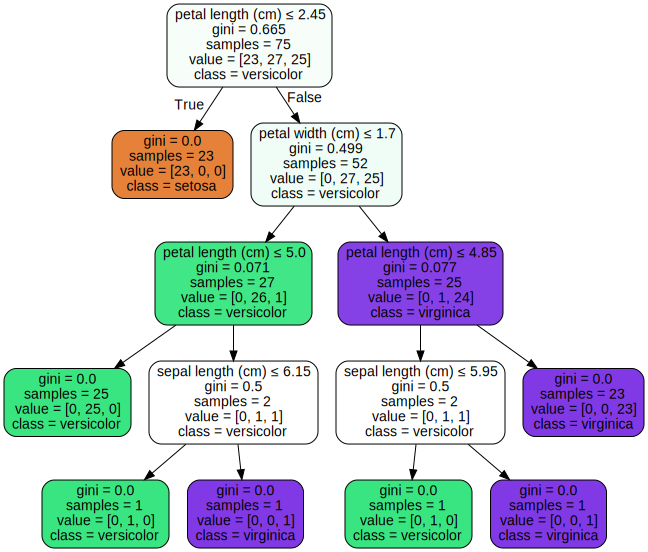

In [6]:
dot_data = export_graphviz(classifier, out_file=None, 
                      feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                   filled=True, rounded=True,  
                   special_characters=True)  
graphviz.Source(dot_data)